In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [2]:
# create dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
# Leaky ReLU
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.6314 - accuracy: 0.5054 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8416 - accuracy: 0.7247 - val_loss: 0.7130 - val_accuracy: 0.7656 - loss: 0.8882 - accura - ETA: 1s - loss: - E
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7053 - accuracy: 0.7637 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6325 - accuracy: 0.7908 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5992 - accuracy: 0.8021 - val_loss: 0.5582 - val_accuracy: 0.8198
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5624 - accuracy: 0.8142 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5379 - accur

In [7]:
tf.random.set_seed(42)
np.random.seed(42)

In [8]:
# PReLU
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.6969 - accuracy: 0.4974 - val_loss: 0.9255 - val_accuracy: 0.7186cy: 
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8706 - accuracy: 0.7247 - val_loss: 0.7305 - val_accuracy: 0.7628
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7211 - accuracy: 0.7620 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6448 - accuracy: 0.7881 - val_loss: 0.6004 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6078 - accuracy: 0.8004 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5693 - accuracy: 0.8118 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5428 - accuracy: 0.8193 - val_loss: 0.5196 - val_accur

In [11]:
# SELU
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [15]:
# scale inputs to mean 0 & std to 1
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [16]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 21s 11ms/step - loss: 1.3906 - accuracy: 0.4592 - val_loss: 0.7322 - val_accuracy: 0.7440
Epoch 2/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.6896 - accuracy: 0.7526 - val_loss: 0.6524 - val_accuracy: 0.7696
Epoch 3/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5689 - accuracy: 0.8008 - val_loss: 0.5594 - val_accuracy: 0.7982
Epoch 4/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5811 - accuracy: 0.8027 - val_loss: 0.4854 - val_accuracy: 0.8346
Epoch 5/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5068 - accuracy: 0.8239 - val_loss: 0.4546 - val_accuracy: 0.8454


In [17]:
# ReLU activation function
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 19s 10ms/step - loss: 2.0875 - accuracy: 0.1791 - val_loss: 1.4671 - val_accuracy: 0.3808
Epoch 2/5
1719/1719 [==============================] - 16s 9ms/step - loss: 1.3122 - accuracy: 0.4300 - val_loss: 1.0152 - val_accuracy: 0.5714
Epoch 3/5
1719/1719 [==============================] - 16s 9ms/step - loss: 1.0237 - accuracy: 0.5732 - val_loss: 0.9137 - val_accuracy: 0.5864
Epoch 4/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8591 - accuracy: 0.6500 - val_loss: 0.7524 - val_accuracy: 0.7178
Epoch 5/5
1719/1719 [==============================] - 16s 10ms/step - loss: 0.8111 - accuracy: 0.6780 - val_loss: 0.6833 - val_accuracy: 0.7482


In [21]:
# batch normalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_209 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_210 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_211 (Dense)            (None, 10)               

In [23]:
# parameters
# 2 are trainable (backpropatation), 2 are not
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2287 - accuracy: 0.5994 - val_loss: 0.5525 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5995 - accuracy: 0.7958 - val_loss: 0.4724 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5311 - accuracy: 0.8172 - val_loss: 0.4375 - val_accuracy: 0.8552
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4885 - accuracy: 0.8294 - val_loss: 0.4152 - val_accuracy: 0.8602
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4717 - accuracy: 0.8347 - val_loss: 0.3998 - val_accuracy: 0.8636
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4420 - accuracy: 0.8459 - val_loss: 0.3867 - val_accuracy: 0.8696
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4286 - accuracy: 0.8495 - val_loss: 0.3763 - val_accuracy:

In [26]:
# layer before BatchNormalization does not  need bias
# also batch normlization before activation function might be better
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3677 - accuracy: 0.5605 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7136 - accuracy: 0.7702 - val_loss: 0.5566 - val_accuracy: 0.8180 ETA: 1s - loss: 0.7220 - accuracy - ETA: 0s -
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6123 - accuracy: 0.7988 - val_loss: 0.5007 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5547 - accuracy: 0.8148 - val_loss: 0.4666 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5255 - accuracy: 0.8232 - val_loss: 0.4434 - val_accuracy: 0.8538
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4947 - accuracy: 0.8326 - val_loss: 0.4263 - val_accuracy: 0.8548
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4736 - accur

In [29]:
# Create model A to reuse
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [30]:
X_train_A.shape

(43986, 28, 28)

In [31]:
X_train_B.shape

(200, 28, 28)

In [32]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [33]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [36]:
tf.random.set_seed(42)
np.random.seed(42)

In [37]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [38]:
model_A.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.SGD(lr=1e-3),
               metrics=["accuracy"])

In [40]:
history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.9248 - accuracy: 0.6994 - val_loss: 0.3895 - val_accuracy: 0.8665
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3651 - accuracy: 0.8745 - val_loss: 0.3287 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3182 - accuracy: 0.8895 - val_loss: 0.3014 - val_accuracy: 0.8994
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3049 - accuracy: 0.8956 - val_loss: 0.2894 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2804 - accuracy: 0.9026 - val_loss: 0.2775 - val_accuracy: 0.9061
Epoch 6/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2701 - accuracy: 0.9076 - val_loss: 0.2735 - val_accuracy: 0.9063
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2626 - accuracy: 0.9096 - val_loss: 0.2721 - val_accuracy:

In [41]:
model_A.save("model_A.hb5")

INFO:tensorflow:Assets written to: model_A.hb5\assets


In [42]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [43]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [44]:
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 70ms/step - loss: 1.0360 - accuracy: 0.4975 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.5883 - accuracy: 0.6971 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 0.4380 - accuracy: 0.8854 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 16ms/step - loss: 0.4021 - accuracy: 0.8712 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3361 - accuracy: 0.9348 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3113 - accuracy: 0.9233 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2817 - accuracy: 0.9299 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [45]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_221 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_222 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_223 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_224 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_225 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_226 (Dense)            (None, 1)                

In [48]:
model_A = keras.models.load_model("model_A.hb5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [49]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [50]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [51]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 51ms/step - loss: 0.6170 - accuracy: 0.6184 - val_loss: 0.5860 - val_accuracy: 0.6318
Epoch 2/4
7/7 [==============================] - 0s 15ms/step - loss: 0.5562 - accuracy: 0.6583 - val_loss: 0.5482 - val_accuracy: 0.6704
Epoch 3/4
7/7 [==============================] - 0s 15ms/step - loss: 0.4902 - accuracy: 0.7509 - val_loss: 0.5160 - val_accuracy: 0.7069
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.4903 - accuracy: 0.7405 - val_loss: 0.4871 - val_accuracy: 0.7292
Epoch 1/16
7/7 [==============================] - 1s 48ms/step - loss: 0.4387 - accuracy: 0.7774 - val_loss: 0.3469 - val_accuracy: 0.8631
Epoch 2/16
7/7 [==============================] - 0s 16ms/step - loss: 0.2976 - accuracy: 0.9143 - val_loss: 0.2609 - val_accuracy: 0.9249
Epoch 3/16
7/7 [==============================] - 0s 18ms/step - loss: 0.2036 - accuracy: 0.9777 - val_loss: 0.2115 - val_accuracy: 0.9554
Epoch 4/16
7/7 [===============

In [52]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [53]:
# result is good in this instance with this configuration,
# but transfer learning works best with deel convolutional neural networks
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9930


[0.06832191348075867, 0.9929999709129333]

In [55]:
# Optimizers
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [56]:
# Learning rate scheduling
# power scheduling
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [57]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5980 - accuracy: 0.7933 - val_loss: 0.4031 - val_accuracy: 0.8598
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3829 - accuracy: 0.8636 - val_loss: 0.3714 - val_accuracy: 0.8720
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3491 - accuracy: 0.8771 - val_loss: 0.3748 - val_accuracy: 0.8740
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3277 - accuracy: 0.8813 - val_loss: 0.3503 - val_accuracy: 0.8792
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8859 - val_loss: 0.3451 - val_accuracy: 0.8780.3220 -  - ETA: 0s - loss:
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2922 - accuracy: 0.8941 - val_loss: 0.3418 - val_accuracy: 0.8820
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2869 - accuracy: 0.8969 - val_lo

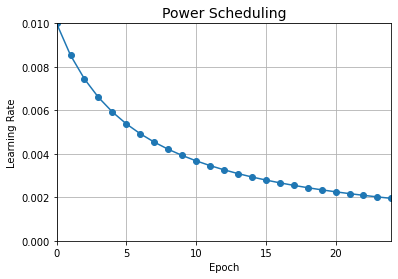

In [59]:
import math
import matplotlib.pyplot as plt


learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [60]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [61]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [62]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [63]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 1.1430 - accuracy: 0.7303 - val_loss: 0.8429 - val_accuracy: 0.7736
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7260 - accuracy: 0.7897 - val_loss: 0.5542 - val_accuracy: 0.8248
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5940 - accuracy: 0.8225 - val_loss: 0.8124 - val_accuracy: 0.7616
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5440 - accuracy: 0.8361 - val_loss: 0.6128 - val_accuracy: 0.8352
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5008 - accuracy: 0.8459 - val_loss: 0.5940 - val_accuracy: 0.8422
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4403 - accuracy: 0.8645 - val_loss: 0.4643 - val_accuracy: 0.8622
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4233 - accuracy: 0.8722 - val_loss: 0.5178 - val_accuracy:

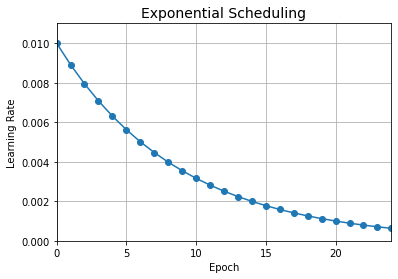

In [64]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [65]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [66]:
# Custom class to update learning rate at each iteration instead of epoch

K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 1.1103 - accuracy: 0.7386 - val_loss: 0.8914 - val_accuracy: 0.7382
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7407 - accuracy: 0.7795 - val_loss: 0.5423 - val_accuracy: 0.8434
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5933 - accuracy: 0.8217 - val_loss: 0.6294 - val_accuracy: 0.8234
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5129 - accuracy: 0.8418 - val_loss: 0.4616 - val_accuracy: 0.8608
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4828 - accuracy: 0.8452 - val_loss: 0.4480 - val_accuracy: 0.8506
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4250 - accuracy: 0.8630 - val_loss: 0.5007 - val_accuracy: 0.8666
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3916 - accuracy: 0.8741 - val_loss: 0.4906 - val_accuracy:

In [67]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

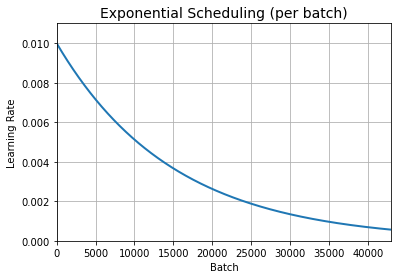

In [68]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

In [69]:
# 1cycle scheduling
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [70]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.3117          


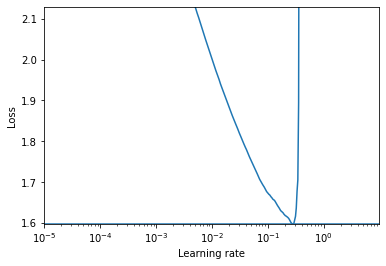

In [71]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [72]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [73]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 2s 4ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8336
Epoch 2/25
430/430 [==============================] - 1s 3ms/step - loss: 0.4581 - accuracy: 0.8396 - val_loss: 0.4275 - val_accuracy: 0.8524
Epoch 3/25
430/430 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8546 - val_loss: 0.4117 - val_accuracy: 0.8580
Epoch 4/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8643 - val_loss: 0.3868 - val_accuracy: 0.8686
Epoch 5/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8717 - val_loss: 0.3767 - val_accuracy: 0.8682
Epoch 6/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3456 - accuracy: 0.8773 - val_loss: 0.3741 - val_accuracy: 0.8708
Epoch 7/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8809 - val_loss: 0.3634 - val_accuracy: 0.8714
Epoch 

In [74]:
# l1 and l2 regularization
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [75]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 3.2189 - accuracy: 0.7967 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7280 - accuracy: 0.8247 - val_loss: 0.6850 - val_accuracy: 0.8376


In [76]:
# functools.partial - create thin wrapper to regularize
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 3.2911 - accuracy: 0.7924 - val_loss: 0.7218 - val_accuracy: 0.8310
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7282 - accuracy: 0.8245 - val_loss: 0.6826 - val_accuracy: 0.8382


In [77]:
# dropout
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7611 - accuracy: 0.7576 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 2/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4306 - accuracy: 0.8401 - val_loss: 0.3395 - val_accuracy: 0.8720


In [78]:
# alpha dropout for self-normalizing network based on SELU activation function
# preserves mean & stdev of inputs
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7972 - accuracy: 0.7128 - val_loss: 0.6027 - val_accuracy: 0.8414
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5700 - accuracy: 0.7896 - val_loss: 0.5597 - val_accuracy: 0.8486
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5345 - accuracy: 0.8024 - val_loss: 0.5009 - val_accuracy: 0.8568
Epoch 4/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5097 - accuracy: 0.8089 - val_loss: 0.4488 - val_accuracy: 0.8622
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5050 - accuracy: 0.8132 - val_loss: 0.4388 - val_accuracy: 0.8692
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4753 - accuracy: 0.8236 - val_loss: 0.4518 - val_accuracy: 0.86720s - loss: 0.4747 
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4729 - accuracy: 0.8265 - val_loss: 0.49

In [79]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4667 - accuracy: 0.8625


[0.4666905701160431, 0.862500011920929]

In [80]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 0.3393 - accuracy: 0.8852


[0.33931753039360046, 0.8851636648178101]

In [81]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.4203 - accuracy: 0.8438


In [82]:
# Monte Carlo (MC) Dropout

# single instance of model predict
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [83]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [84]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.67, 0.  , 0.3 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.83, 0.  , 0.17]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.2 , 0.  , 0.78]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.37, 0.  , 0.52]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.01, 0.  , 0.78]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.3 , 0.  , 0.68]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.07, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.22, 0.  , 0.57]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.58, 0.  , 0.01, 0.  , 0

In [85]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.16, 0.  , 0.71]],
      dtype=float32)

In [86]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.2 , 0.  , 0.29]],
      dtype=float32)

In [87]:
y_pred = np.argmax(y_proba, axis=1)

In [88]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8669

In [89]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [90]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [91]:
mc_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_250 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_251 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_252 (Dense)            (None, 10)              

In [92]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [93]:
mc_model.set_weights(model.get_weights())

In [94]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.16, 0.  , 0.74]],
      dtype=float32)

In [95]:
# Max norm

layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [96]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5765 - accuracy: 0.8038 - val_loss: 0.3780 - val_accuracy: 0.8644
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3553 - accuracy: 0.8706 - val_loss: 0.3923 - val_accuracy: 0.8660
